In [1]:
data_dir = './dynsys'

#Open dynsys nc array
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Open dynsys nc array
dynsys = nc.Dataset(data_dir+'/sub-032304_array_dynsys_EC_alpha.nc','r')

In [2]:
ordered_list = ['frontalpole-rh', 'frontalpole-lh', 'rostralmiddlefrontal-rh', 'rostralmiddlefrontal-lh', 'parsorbitalis-rh',
                'parsorbitalis-lh', 'medialorbitofrontal-rh', 'medialorbitofrontal-lh', 'rostralanteriorcingulate-rh', 
                'rostralanteriorcingulate-lh', 'parstriangularis-rh', 'parstriangularis-lh', 'lateralorbitofrontal-rh', 
                'lateralorbitofrontal-lh', 'superiorfrontal-rh', 'superiorfrontal-lh', 'caudalanteriorcingulate-rh',
                'caudalanteriorcingulate-lh', 'parsopercularis-rh', 'parsopercularis-lh', 'caudalmiddlefrontal-rh', 
                'caudalmiddlefrontal-lh', 'temporalpole-rh', 'temporalpole-lh', 'insula-rh', 'insula-lh', 'entorhinal-rh', 
                'entorhinal-lh', 'precentral-rh', 'precentral-lh', 'posteriorcingulate-rh', 'posteriorcingulate-lh', 
                'superiortemporal-rh', 'superiortemporal-lh', 'postcentral-rh', 'postcentral-lh', 'transversetemporal-rh', 
                'transversetemporal-lh', 'paracentral-rh', 'paracentral-lh', 'middletemporal-rh', 'middletemporal-lh', 
                'parahippocampal-rh', 'parahippocampal-lh', 'inferiortemporal-rh', 'inferiortemporal-lh', 'supramarginal-rh', 
                'supramarginal-lh', 'fusiform-rh', 'fusiform-lh', 'bankssts-rh', 'bankssts-lh', 'isthmuscingulate-rh', 
                'isthmuscingulate-lh', 'precuneus-rh', 'precuneus-lh', 'superiorparietal-rh', 'superiorparietal-lh', 
                'inferiorparietal-rh', 'inferiorparietal-lh', 'lingual-rh', 'lingual-lh', 'cuneus-rh', 'cuneus-lh', 
                'pericalcarine-rh', 'pericalcarine-lh', 'lateraloccipital-rh', 'lateraloccipital-lh']

In [3]:
# Extract the data from '__xarray_dataarray_variable__'
data_variable = dynsys['__xarray_dataarray_variable__'][:]

# Compute the mean across the 'bootstrap_samples' dimension (which is axis=0)
mean_connectivity = np.mean(data_variable, axis=0)

mean_df = pd.DataFrame(mean_connectivity)
mean_df.columns = dynsys['region1']
mean_df.index = dynsys['region1']

ordered_mean_df = mean_df.loc[ordered_list, ordered_list]

ordered_mean_df.to_csv(f'./mean_df_ordered.csv',header=True,index=False)

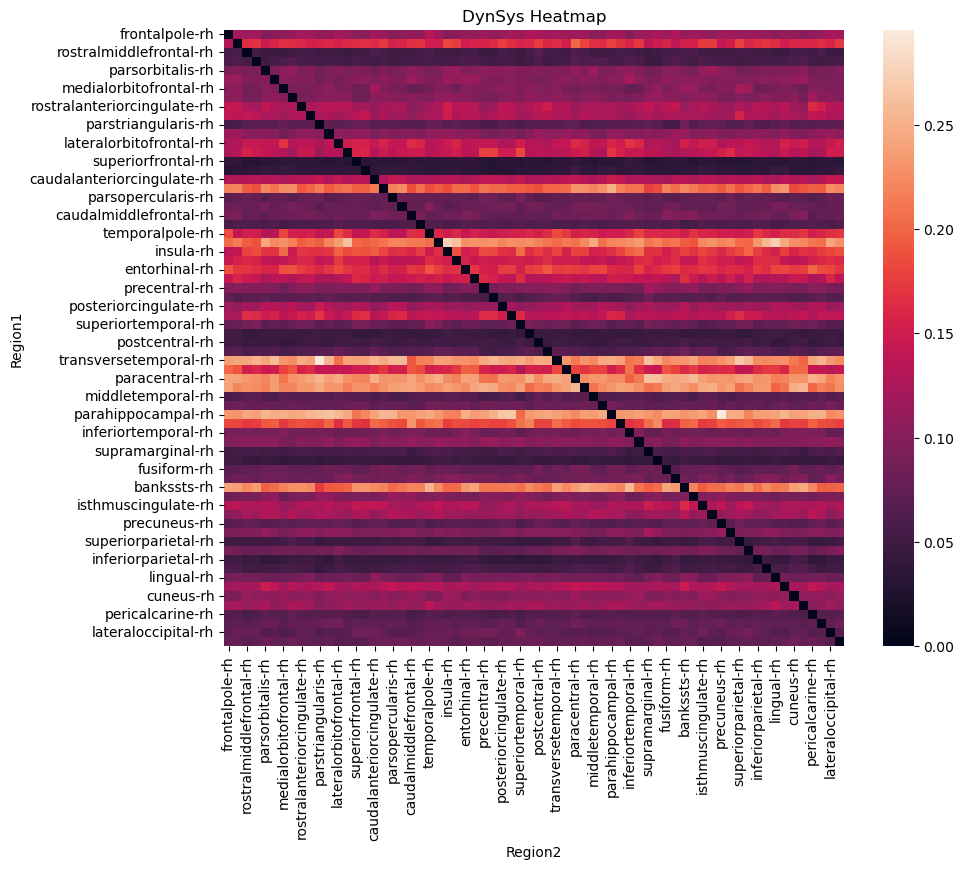

In [4]:
# Extract the data from '__xarray_dataarray_variable__'
# Extract the data from '__xarray_dataarray_variable__'
#data_variable = dynsys['__xarray_dataarray_variable__'][:]

# Compute the mean across the 'bootstrap_samples' dimension (which is axis=0)
#mean_connectivity = np.mean(data_variable, axis=0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_mean_df, annot=False)
plt.title('DynSys Heatmap')
plt.xlabel('Region2')
plt.ylabel('Region1')
plt.show()

# Close the NetCDF file
dynsys.close()
